In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

iris_df = pd.read_csv("iris.data",names=["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm","class"])

iris_df.sample(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
141,6.9,3.1,5.1,2.3,Iris-virginica
86,6.7,3.1,4.7,1.5,Iris-versicolor
21,5.1,3.7,1.5,0.4,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
98,5.1,2.5,3.0,1.1,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-setosa
59,5.2,2.7,3.9,1.4,Iris-versicolor
134,6.1,2.6,5.6,1.4,Iris-virginica
45,4.8,3.0,1.4,0.3,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa


In [3]:
iris_df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length in cm    150 non-null float64
sepal width in cm     150 non-null float64
petal length in cm    150 non-null float64
petal width in cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [5]:
iris_df.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [6]:
iris_df['class'] = pd.factorize(iris_df['class'])[0]
iris_df.groupby(["class"]).count()


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [7]:
iris_df.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
sepal length in cm,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length in cm,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width in cm,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [8]:
iris_df.var()

sepal length in cm    0.685694
sepal width in cm     0.188004
petal length in cm    3.113179
petal width in cm     0.582414
class                 0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

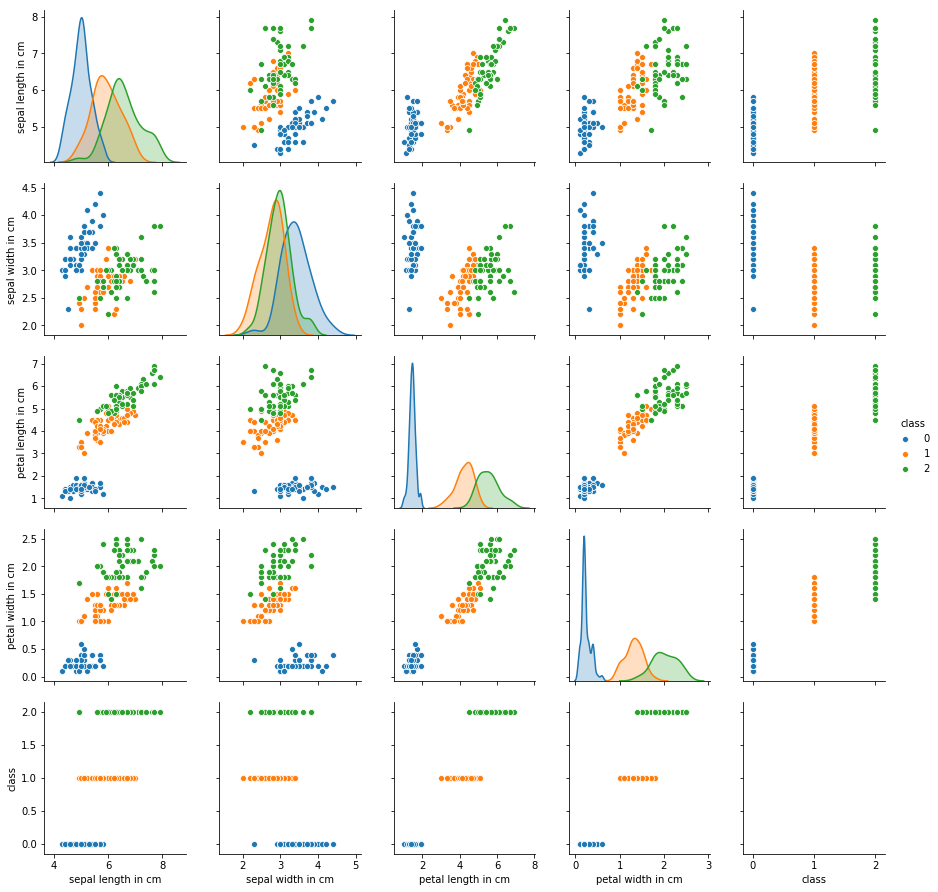

In [9]:
sns.pairplot(iris_df, hue="class")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [10]:
from sklearn.model_selection import train_test_split
iris_feature_df = iris_df.drop(labels= "class" , axis = 1)
iris_feature_df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris_labels = iris_df['class']
X = np.array(iris_feature_df)
X.shape

(150, 4)

In [12]:
y = np.array(iris_labels)
y.shape

(150,)

In [13]:
from scipy.stats import zscore
from scipy import stats
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
#X_train_z = stats.zscore(X_train) 
#X_test_z = stats.zscore(X_test)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

k_counter = [3,5,9]
for k in k_counter:
    NNH = KNeighborsClassifier(n_neighbors= k)
    NNH.fit(X_train, y_train)
    y_pred = NNH.predict(X_test)
    #knn_score = NNH.score( X_test,y_test)
    knn_accuracy_score = metrics.accuracy_score(y_test, y_pred)
    print("For k = {} the predicted score is = {} ".format(k, knn_accuracy_score))
    
    

For k = 3 the predicted score is = 1.0 
For k = 5 the predicted score is = 1.0 
For k = 9 the predicted score is = 0.9666666666666667 


In [15]:
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1, 2]), index=['true:0', 'true:1', 'true:2'], columns=['pred:0', 'pred:1','pred:2']))
#print(pd.DataFrame(metrics.confusion_matrix(y_test, predicted_labels, labels=[0 ,1, 2])))

        pred:0  pred:1  pred:2
true:0      11       0       0
true:1       0      12       1
true:2       0       0       6


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [16]:
k_values=[]
knn_accuracy=[]
mse_values=[]
for k in range(1,20,2):
    NNH = KNeighborsClassifier(n_neighbors= k)
    NNH.fit(X_train, y_train)
    y_pred = NNH.predict(X_test)
    #knn_score = NNH.score( X_test,y_test)
    knn_accuracy_score = metrics.accuracy_score(y_test, y_pred)
    mse = 1 - knn_accuracy_score
    k_values.append(k)
    knn_accuracy.append(knn_accuracy_score)
    mse_values.append(mse)
    print("For k = {} the predicted score is = {} and MSE is = {} ".format(k, knn_accuracy_score,mse))
    

For k = 1 the predicted score is = 1.0 and MSE is = 0.0 
For k = 3 the predicted score is = 1.0 and MSE is = 0.0 
For k = 5 the predicted score is = 1.0 and MSE is = 0.0 
For k = 7 the predicted score is = 0.9666666666666667 and MSE is = 0.033333333333333326 
For k = 9 the predicted score is = 0.9666666666666667 and MSE is = 0.033333333333333326 
For k = 11 the predicted score is = 0.9666666666666667 and MSE is = 0.033333333333333326 
For k = 13 the predicted score is = 0.9666666666666667 and MSE is = 0.033333333333333326 
For k = 15 the predicted score is = 0.9666666666666667 and MSE is = 0.033333333333333326 
For k = 17 the predicted score is = 0.9666666666666667 and MSE is = 0.033333333333333326 
For k = 19 the predicted score is = 0.9666666666666667 and MSE is = 0.033333333333333326 


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
[0.0, 0.0, 0.0, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326]


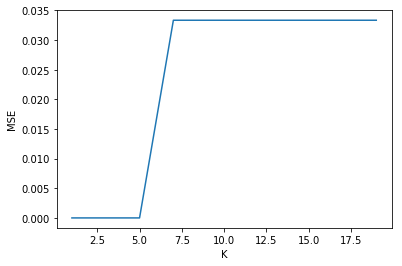

In [17]:
print (k_values)
print (mse_values)
import matplotlib.pyplot as plt
plt.plot(k_values,mse_values)
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

# Naive Bayes with Iris Data

In [18]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [26]:
iris_nb = pd.read_csv("iris.data",names=["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm","class"])

iris_nb.sample(10)
iris_nb['class'] = pd.factorize(iris_nb['class'])[0]
X = iris_nb.drop(labels= "class" , axis = 1)
y = iris_nb['class']


In [27]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64
     sepal length in cm  sepal width in cm  petal length in cm  \
0                   5.1                3.5                 1.4   
1                   4.9                3.0                 1.4   
2                   4.7                3.2                 1.3   
3                   4.6                3.1                 1.5   
4                   5.0                3.6                 1.4   
5               

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [28]:
iris_nb.groupby(["class"]).count()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


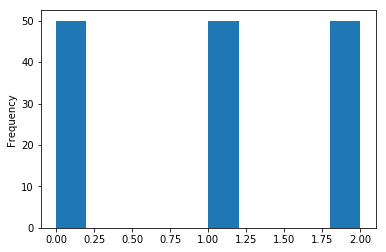

In [51]:
iris_nb["class"].plot.hist()

In [ ]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [30]:
X.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
sepal length in cm,1.000000,-0.109369,0.871754,0.817954
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544
petal length in cm,0.871754,-0.420516,1.000000,0.962757
petal width in cm,0.817954,-0.356544,0.962757,1.000000


### Split data in Training and test set in 80:20.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [40]:
#X_train_z = stats.zscore(X_train) 
#X_test_z = stats.zscore(X_test)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.fit_transform(X_train)
scaler.fit(X_test)
X_test_scale = scaler.fit_transform(X_test)

### Question 14 
Train and Fit NaiveBayes Model

In [43]:
#Fit the model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scale, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
#Predict
expected = y_test
predicted = model.predict(X_test_scale)


### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [45]:
# show Confusion Matrix
print(pd.DataFrame(metrics.confusion_matrix(expected, predicted, labels=[0,1,2]), index=['true:0','true:1', 'true:2'], columns=['pred:0','pred:1', 'pred:2']))

        pred:0  pred:1  pred:2
true:0      11       0       0
true:1       0      10       3
true:2       0       0       6


In [48]:
# show accuracy
metrics.accuracy_score(expected,predicted)

0.9

In [ ]:
#Show precision and Recall metrics

In [49]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

   micro avg       0.90      0.90      0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30



# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [ ]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [ ]:
# use from sklearn.svm import SVC

In [ ]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [ ]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [ ]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [ ]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [ ]:
gs.fit(X_train_scaled, y_train) 

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 